# Classification by Random Forest and Decision Tree of the resulting genotype for position 1016 of kdr mutations in Aedes aegypti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import choice
import openpyxl
from imblearn.over_sampling import RandomOverSampler

### Base de datos para entrenamiento

In [2]:
datos = pd.read_excel('base_de_datos_1016.xlsx', sheet_name='Hoja1')
datos

,id_muestra,Placa,Distrito,numero_distrito,Muestra,Tm_1016,Tm_Estandar_1016,DifTmSS,DifTmSR,DifTmRR,DifTmSS_abs,DifTmSR_abs,DifTmRR_abs,Genotipo_1016,Abs_260,Abs_260_280,Abs_260_230,Criterio_260_280,Criterio_260_230
0,0,1,Hurlingham,135,1,72.57,72.66,-0.63,-0.09,0.36,0.63,0.09,0.36,Heterocigoto,1.5,1.90,1.71,1,3
1,1,1,Hurlingham,135,2,72.51,72.66,-0.69,-0.15,0.30,0.69,0.15,0.30,Heterocigoto,1.3,1.90,1.79,1,3
2,2,1,Hurlingham,135,3,72.50,72.66,-0.70,-0.16,0.29,0.70,0.16,0.29,Heterocigoto,3.5,1.94,1.94,1,2
3,3,1,Hurlingham,135,4,73.35,73.20,0.15,0.69,1.14,0.15,0.69,1.14,Sensible,1.0,1.97,1.86,1,2
4,4,1,Hurlingham,135,5,72.64,72.66,-0.56,-0.02,0.43,0.56,0.02,0.43,Heterocigoto,3.5,1.90,2.00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,157,2,Pergamino,81,12,73.48,73.50,-0.02,0.55,0.89,0.02,0.55,0.89,Sensible,3.9,2.07,2.22,1,1
158,158,2,Pergamino,81,13,73.81,73.50,0.31,0.88,1.22,0.31,0.88,1.22,Sensible,1.8,1.91,1.90,1,1
159,159,2,Pergamino,81,14,73.53,73.50,0.03,0.60,0.94,0.03,0.60,0.94,Sensible,1.3,1.90,2.09,1,1
160,160,2,Pergamino,81,15,73.46,73.50,-0.04,0.53,0.87,0.04,0.53,0.87,Sensible,2.2,1.95,2.11,1,1


In [3]:
datos['Genotipo_1016'].value_counts()

Genotipo_1016
Sensible        92
Heterocigoto    63
Resistente       7
Name: count, dtype: int64

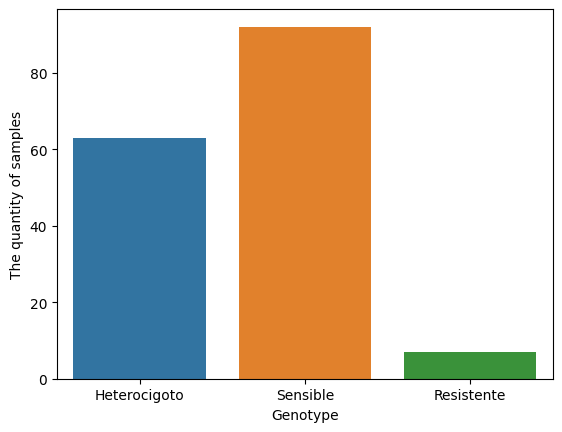

In [4]:
sns.countplot(x=datos['Genotipo_1016'])

# Agregar etiquetas a los ejes
plt.xlabel('Genotype')  # Etiqueta para el eje X
plt.ylabel('The quantity of samples')  # Etiqueta para el eje Y

# Mostrar el gráfico
plt.show()

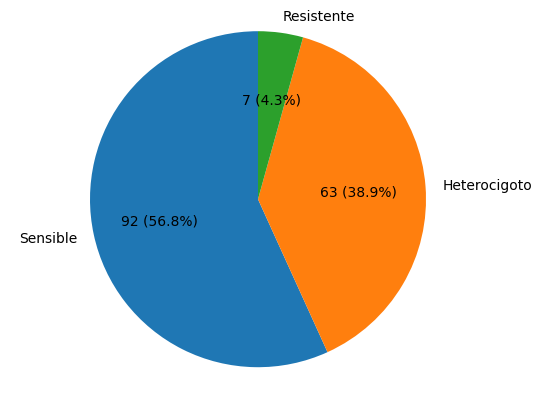

In [5]:
# Obtén los conteos de cada categoría en 'Genotipo_1016'
conteos_genotipo = datos['Genotipo_1016'].value_counts()

plt.pie(conteos_genotipo, labels=conteos_genotipo.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo) / 100, p), startangle=90)

# Ajustar el diseño para que la torta se vea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

### Regresión

In [6]:
def convertir_sensible(text):
    if text == 'Sensible':
        variable = 1
    else:
        variable = 0
    return variable

def convertir_heterocigoto(text):
    if text == 'Heterocigoto':
        variable = 1
    else:
        variable = 0
    return variable

def convertir_resistente(text):
    if text == 'Resistente':
        variable = 1
    else:
        variable = 0
    return variable

datos['EsSensible'] = datos['Genotipo_1016'].apply(convertir_sensible)
datos['EsHeterocigoto'] = datos['Genotipo_1016'].apply(convertir_heterocigoto)
datos['EsResistente'] = datos['Genotipo_1016'].apply(convertir_resistente)

In [7]:
import statsmodels.formula.api as smf

mod = smf.ols("EsSensible ~ Tm_1016 + DifTmSS_abs + DifTmSR_abs + DifTmRR_abs", datos).fit()

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             EsSensible   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     576.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.01e-92
Time:                        19:16:42   Log-Likelihood:                 106.95
No. Observations:                 162   AIC:                            -203.9
Df Residuals:                     157   BIC:                            -188.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5089      6.438      0.234      

### Base de datos para test

In [8]:
base_test = pd.read_excel('base_test_1016.xlsx', sheet_name='Hoja1')
base_test

,id_muestra,Placa,Distrito,numero_distrito,Muestra,Tm_1016,Tm_Estandar_1016,DifTmSS,DifTmSR,DifTmRR,DifTmSS_abs,DifTmSR_abs,DifTmRR_abs,Genotipo_1016,Abs_260,Abs_260_280,Abs_260_230,Criterio_260_280,Criterio_260_230
0,0,3,Pergamino,81,17,73.55,73.51,0.04,0.63,0.94,0.04,0.63,0.94,Sensible,4.6,2.04,2.17,1,1
1,1,3,Pergamino,81,18,73.56,73.51,0.05,0.64,0.95,0.05,0.64,0.95,Sensible,3.4,1.98,2.07,1,1
2,2,3,Pergamino,81,19,73.51,73.51,0.00,0.59,0.90,0.00,0.59,0.90,Sensible,3.4,2.02,2.08,1,1
3,3,3,Pergamino,81,20,73.59,73.51,0.08,0.67,0.98,0.08,0.67,0.98,Sensible,2.8,1.95,1.89,1,1
4,4,3,Pergamino,81,21,73.58,73.51,0.07,0.66,0.97,0.07,0.66,0.97,Sensible,1.4,1.90,1.96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,3,Escobar,116,4,73.40,73.51,-0.11,0.48,0.79,0.11,0.48,0.79,Sensible,3.1,2.02,2.34,1,1
78,78,3,Escobar,116,5,73.39,73.51,-0.12,0.47,0.78,0.12,0.47,0.78,Sensible,1.6,2.06,2.09,1,1
79,79,3,Escobar,116,6,73.53,73.51,0.02,0.61,0.92,0.02,0.61,0.92,Sensible,8.2,2.14,2.08,4,1
80,80,3,Escobar,116,7,73.53,73.51,0.02,0.61,0.92,0.02,0.61,0.92,Sensible,7.1,2.02,2.33,1,1


In [9]:
base_test['Genotipo_1016'].value_counts()

Genotipo_1016
Sensible        57
Heterocigoto    21
Resistente       4
Name: count, dtype: int64

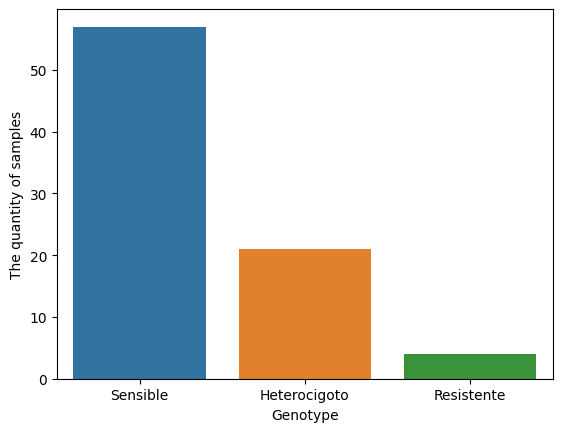

In [10]:
sns.countplot(x=base_test['Genotipo_1016'])

# Agregar etiquetas a los ejes
plt.xlabel('Genotype')  # Etiqueta para el eje X
plt.ylabel('The quantity of samples')  # Etiqueta para el eje Y

# Mostrar el gráfico
plt.show()

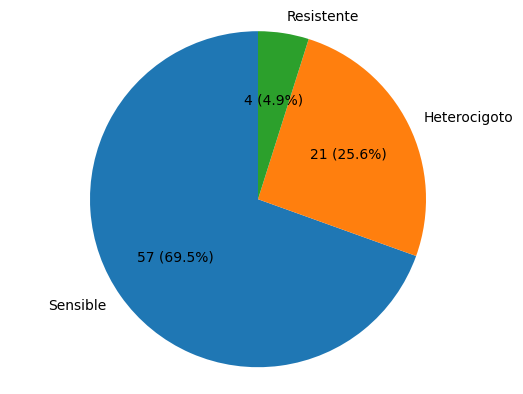

In [11]:
# Obtén los conteos de cada categoría en 'Genotipo_1016'
conteos_genotipo = base_test['Genotipo_1016'].value_counts()

plt.pie(conteos_genotipo, labels=conteos_genotipo.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo) / 100, p), startangle=90)

# Ajustar el diseño para que la torta se vea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

---- 

### Train Test Split
Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba

In [12]:
X_train = datos[['id_muestra', 'Tm_1016', 'DifTmSS_abs', 'DifTmSR_abs', 'DifTmRR_abs']]
y_train = datos['Genotipo_1016'] # Nos quedamos sólo con el target

In [13]:
X_test = base_test[['id_muestra', 'Tm_1016', 'DifTmSS_abs', 'DifTmSR_abs', 'DifTmRR_abs']]
y_test = base_test['Genotipo_1016'] # Nos quedamos sólo con el target

In [14]:
# # 75 % de entrenamiento, 25 % de testeo
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape

(162, 5)

In [16]:
X_test.shape

(82, 5)

--- 

### SMOTE
Balanceamos la información

In [17]:
# from imblearn.over_sampling import SMOTE

# # Inicializar el objeto SMOTE
# smote = SMOTE(random_state=42)

# # Aplicar SMOTE solo al conjunto de entrenamiento para evitar data leakage
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # Concatenar los datos equilibrados
# datos_equilibrados = pd.concat([pd.DataFrame(X_train, columns=X_train.columns), pd.Series(y_train, name='Genotipo_1016')], axis=1)

In [18]:
# # Obtén los conteos de cada categoría en 'Genotipo_1016'
# conteos_genotipo_resampleo = datos_equilibrados['Genotipo_1016'].value_counts()

# plt.pie(conteos_genotipo_resampleo, labels=conteos_genotipo_resampleo.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo_resampleo) / 100, p), startangle=90)

# # Ajustar el diseño para que la torta se vea circular
# plt.axis('equal')

# # Mostrar el gráfico
# plt.show()

In [19]:
# # Puedes verificar la distribución de clases en los datos equilibrados
# print(datos_equilibrados['Genotipo_1016'].value_counts())

----

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [21]:
# Definir el clasificador
dtree = DecisionTreeClassifier(random_state=42, criterion = 'entropy')
best_dtree = dtree.fit(X_train.drop(columns=['id_muestra']),y_train)

In [22]:
# Predecimos con los hiperparámetros optimizados
y_test_pred_dtree = best_dtree.predict(X_test.drop(columns=['id_muestra']))

In [23]:
# Métrica - radio entre aciertos y cantidad total de predicciones
from sklearn.metrics import accuracy_score
print("Índice Accuracy:", accuracy_score(y_test, y_test_pred_dtree))

# Calcular el índice Kappa
from sklearn.metrics import cohen_kappa_score
print("Índice Kappa:", cohen_kappa_score(y_test, y_test_pred_dtree))

Índice Accuracy: 0.9878048780487805
Índice Kappa: 0.9726757747417527


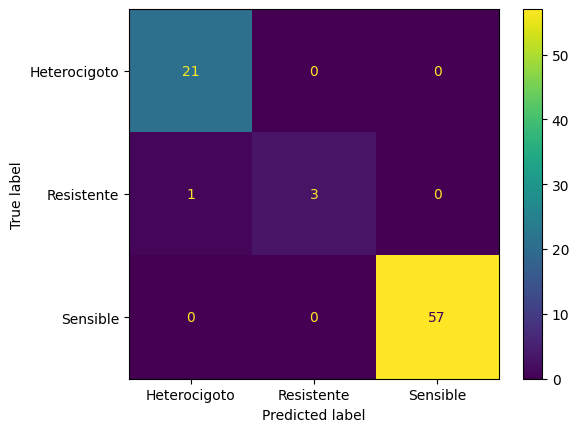

In [24]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_test_pred_dtree,labels=best_dtree.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_dtree.classes_).plot()

In [25]:
from sklearn.model_selection import cross_val_score

scores_dtree = cross_val_score(best_dtree, X_train.drop(columns=['id_muestra']), y_train, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores_dtree*100)
print("Mean accuracy: ", scores_dtree.mean()*100)
print("Standard deviation: ", scores_dtree.std()*100)


Accuracy scores for each fold: [93.93939394 87.87878788 96.875      93.75       75.        ]
Mean accuracy:  89.48863636363636
Standard deviation:  7.810749344716367


In [26]:
# Visualizacion del arbol
from sklearn import tree

In [27]:
r = export_text(best_dtree, feature_names=list(X_train.drop(columns=['id_muestra']).columns))
print(r)

|--- DifTmRR_abs <= 0.56
|   |--- DifTmSS_abs <= 0.70
|   |   |--- Tm_1016 <= 72.55
|   |   |   |--- Tm_1016 <= 72.53
|   |   |   |   |--- class: Heterocigoto
|   |   |   |--- Tm_1016 >  72.53
|   |   |   |   |--- class: Heterocigoto
|   |   |--- Tm_1016 >  72.55
|   |   |   |--- class: Heterocigoto
|   |--- DifTmSS_abs >  0.70
|   |   |--- DifTmSS_abs <= 0.76
|   |   |   |--- class: Resistente
|   |   |--- DifTmSS_abs >  0.76
|   |   |   |--- DifTmRR_abs <= 0.01
|   |   |   |   |--- class: Resistente
|   |   |   |--- DifTmRR_abs >  0.01
|   |   |   |   |--- class: Heterocigoto
|--- DifTmRR_abs >  0.56
|   |--- class: Sensible



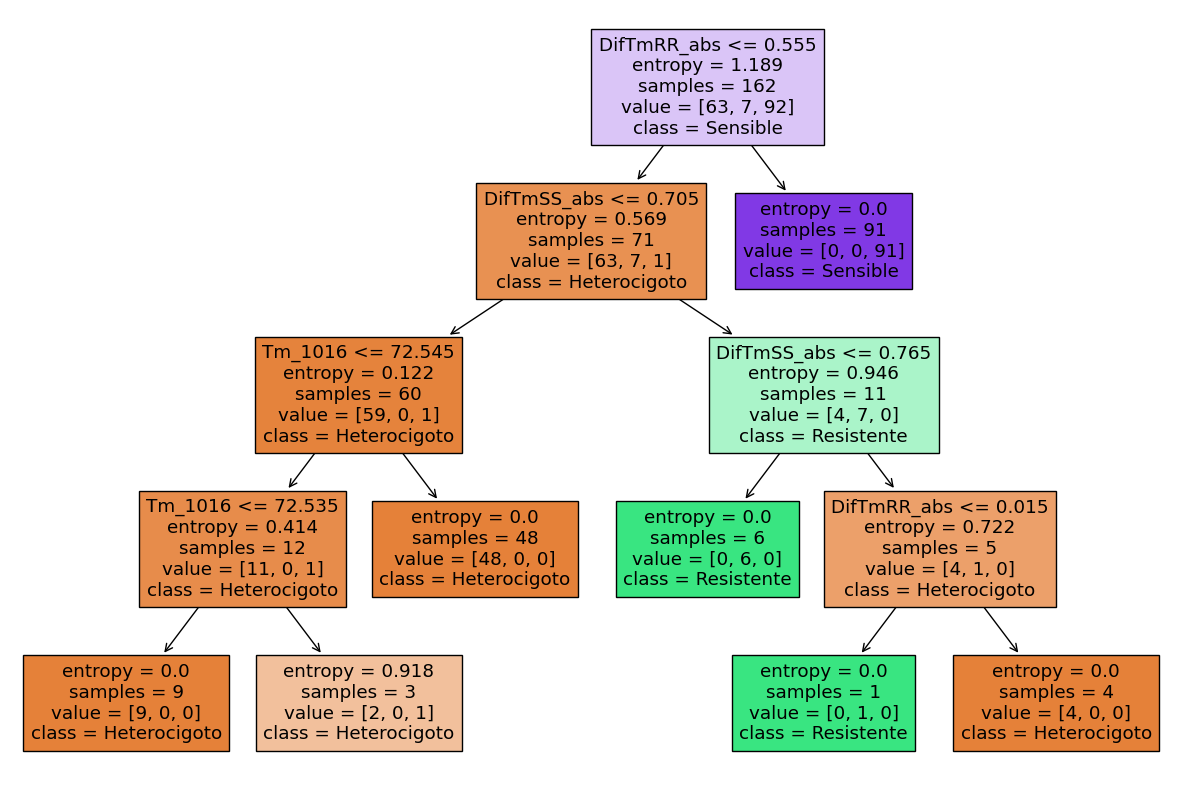

In [28]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(best_dtree, 
                   feature_names = X_train.drop(columns=['id_muestra']).columns,  
                   class_names=list(map(str, best_dtree.classes_)),
                   filled = True)

# Guarda la figura en un archivo PNG
fig.savefig('arbol_decision.png')

In [29]:
# Prediccion y evaluacion
model_predictions_proba = best_dtree.predict_proba(X_test.drop(columns=['id_muestra']))

Text(0.5, 1.0, 'Probability Density Plot')

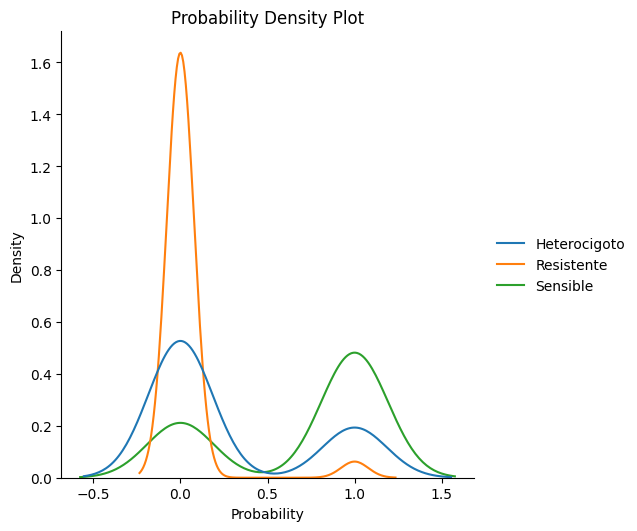

In [30]:
# Crear un DataFrame con las predicciones de probabilidad
df_prob_dtree = pd.DataFrame(model_predictions_proba, columns=['Heterocigoto', 'Resistente', 'Sensible'])

sns.displot(df_prob_dtree, kind="kde")

# Agregar etiquetas al gráfico
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title("Probability Density Plot")

In [31]:
# Matriz de confusión
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test, y_test_pred_dtree))

# True Positives  ---  False Negatives

# False Positives ---  True Negatives

[[21  0  0]
 [ 1  3  0]
 [ 0  0 57]]


* Con la métrica de precisión (precision) podemos medir la calidad del modelo de machine learning en tareas de clasificación. En el ejemplo, se refiere a que la precisión es la respuesta a la pregunta ¿Qué porcentaje de los genotipos que el modelo predijo como heterocigotos, realmente lo hicieron?
* La métrica de exhaustividad (recall) nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. En el ejemplo, se refiere a que la exhaustividad es la respuesta a la pregunta ¿qué porcentaje de los genotipos que son heterocigotos somos capaces de identificar?

In [33]:
print(classification_report(y_test,y_test_pred_dtree))

              precision    recall  f1-score   support

Heterocigoto       0.95      1.00      0.98        21
  Resistente       1.00      0.75      0.86         4
    Sensible       1.00      1.00      1.00        57

    accuracy                           0.99        82
   macro avg       0.98      0.92      0.94        82
weighted avg       0.99      0.99      0.99        82



In [34]:
df_pred_model_final = pd.DataFrame()
df_pred_model_final['id_muestra'] = X_test[["id_muestra"]]
df_pred_model_final['target_real'] = y_test
df_pred_model_final["target_modelo"] = y_test_pred_dtree
df_pred_model_final["prob"] = list(model_predictions_proba)
df_pred_model_final["prob"] = df_pred_model_final["prob"].astype(str)
df_pred_model_final['Tm_1016'] = list(X_test['Tm_1016'])
df_pred_model_final.reset_index(inplace=True)

In [35]:
df_pred_model_final = df_pred_model_final.drop(columns=['index'])
df_pred_model_final

,id_muestra,target_real,target_modelo,prob,Tm_1016
0,0,Sensible,Sensible,[0. 0. 1.],73.55
1,1,Sensible,Sensible,[0. 0. 1.],73.56
2,2,Sensible,Sensible,[0. 0. 1.],73.51
3,3,Sensible,Sensible,[0. 0. 1.],73.59
4,4,Sensible,Sensible,[0. 0. 1.],73.58
...,...,...,...,...,...
77,77,Sensible,Sensible,[0. 0. 1.],73.40
78,78,Sensible,Sensible,[0. 0. 1.],73.39
79,79,Sensible,Sensible,[0. 0. 1.],73.53
80,80,Sensible,Sensible,[0. 0. 1.],73.53


In [36]:
# Separar la columna 'prob' en tres columnas
df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_final['prob'].str.strip('[]').str.split(expand=True)

# Convertir las nuevas columnas a números
df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']].astype(float)

# Eliminar la columna original 'prob'
df_pred_model_final.drop('prob', axis=1, inplace=True)

# Mostrar el DataFrame resultante
df_pred_model_final

,id_muestra,target_real,target_modelo,Tm_1016,prob_heterocigoto,prob_resistente,prob_sensible
0,0,Sensible,Sensible,73.55,0.0,0.0,1.0
1,1,Sensible,Sensible,73.56,0.0,0.0,1.0
2,2,Sensible,Sensible,73.51,0.0,0.0,1.0
3,3,Sensible,Sensible,73.59,0.0,0.0,1.0
4,4,Sensible,Sensible,73.58,0.0,0.0,1.0
...,...,...,...,...,...,...,...
77,77,Sensible,Sensible,73.40,0.0,0.0,1.0
78,78,Sensible,Sensible,73.39,0.0,0.0,1.0
79,79,Sensible,Sensible,73.53,0.0,0.0,1.0
80,80,Sensible,Sensible,73.53,0.0,0.0,1.0


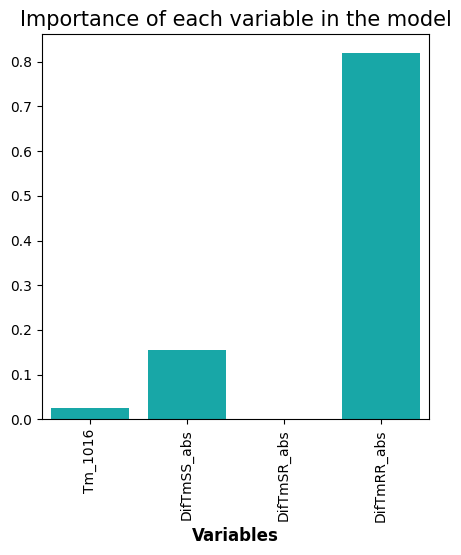

In [37]:
imp_variables = dtree.feature_importances_

plt.figure(figsize=(5, 5))
sns.barplot(x=X_train.drop(columns=['id_muestra']).columns, y=imp_variables, color="c")
plt.xlabel("Variables", fontweight="black", fontsize=12)
plt.title("Importance of each variable in the model", fontsize=15, color="black")
plt.xticks(rotation=90, size=10)

# Guardar el gráfico en un archivo
plt.savefig('importance_plot.png')

plt.show()

In [38]:
# df_pred_model_final.to_excel('prediccion.xlsx', index=False)  

----------- 

### Bosque Aleatorio

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Inicializar el clasificador de bosque aleatorio
clf = RandomForestClassifier(n_estimators=150, random_state=42)

# Ajustar el modelo
clf.fit(X_train.drop(columns=['id_muestra']), y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [41]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test.drop(columns=['id_muestra']))

In [42]:
y_pred

array(['Sensible', 'Sensible', 'Sensible', 'Sensible', 'Sensible',
       'Sensible', 'Sensible', 'Sensible', 'Sensible', 'Sensible',
       'Sensible', 'Sensible', 'Sensible', 'Sensible', 'Heterocigoto',
       'Sensible', 'Heterocigoto', 'Heterocigoto', 'Sensible', 'Sensible',
       'Resistente', 'Heterocigoto', 'Sensible', 'Heterocigoto',
       'Sensible', 'Sensible', 'Heterocigoto', 'Heterocigoto',
       'Heterocigoto', 'Heterocigoto', 'Heterocigoto', 'Sensible',
       'Sensible', 'Sensible', 'Heterocigoto', 'Heterocigoto',
       'Resistente', 'Sensible', 'Sensible', 'Heterocigoto', 'Resistente',
       'Heterocigoto', 'Heterocigoto', 'Sensible', 'Heterocigoto',
       'Sensible', 'Heterocigoto', 'Sensible', 'Sensible', 'Sensible',
       'Sensible', 'Sensible', 'Heterocigoto', 'Sensible', 'Sensible',
       'Resistente', 'Sensible', 'Sensible', 'Heterocigoto',
       'Heterocigoto', 'Sensible', 'Sensible', 'Sensible', 'Sensible',
       'Sensible', 'Sensible', 'Sensible', 'Se

In [43]:
# Métrica - radio entre aciertos y cantidad total de predicciones
from sklearn.metrics import accuracy_score
print("Índice Accuracy:", accuracy_score(y_test, y_pred))

# Calcular el índice Kappa
from sklearn.metrics import cohen_kappa_score
print("Índice Kappa:", cohen_kappa_score(y_test, y_pred))

Índice Accuracy: 0.9878048780487805
Índice Kappa: 0.9729818780889621


In [44]:
from sklearn.model_selection import cross_val_score

scores_random = cross_val_score(clf, X_train.drop(columns=['id_muestra']), y_train, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores_random*100)
print("Mean accuracy: ", scores_random.mean()*100)
print("Standard deviation: ", scores_random.std()*100)


Accuracy scores for each fold: [93.93939394 93.93939394 96.875      90.625      96.875     ]
Mean accuracy:  94.45075757575758
Standard deviation:  2.320056431583082


In [45]:
# Prediccion y evaluacion
model_predictions_bosque = clf.predict_proba(X_test.drop(columns=['id_muestra']))

Text(0.5, 1.0, 'Probability Density Plot')

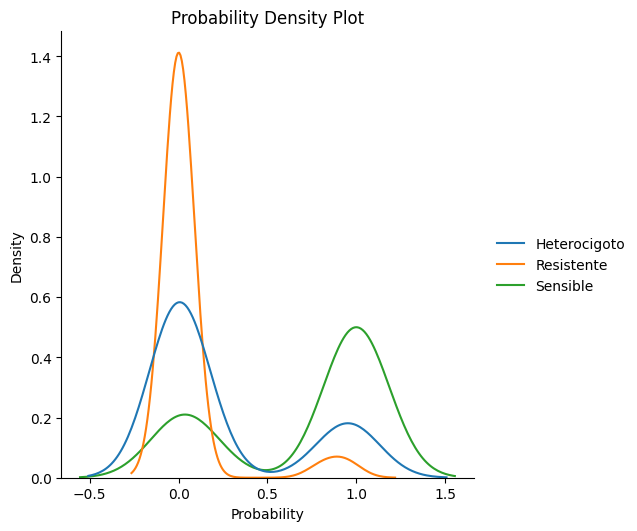

In [46]:
df_prob_random = pd.DataFrame(model_predictions_bosque, columns=['Heterocigoto', 'Resistente', 'Sensible'])
sns.displot(df_prob_random, kind="kde")

# Agregar etiquetas al gráfico
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title("Probability Density Plot")

In [47]:
df_pred_model_bosque = pd.DataFrame()
df_pred_model_bosque['id_muestra'] = X_test[["id_muestra"]]
df_pred_model_bosque['target_real'] = y_test
df_pred_model_bosque["target_modelo"] = y_pred
df_pred_model_bosque["prob"] = list(model_predictions_bosque)
df_pred_model_bosque["prob"] = df_pred_model_bosque["prob"].astype(str)
df_pred_model_bosque['Tm_1016'] = list(X_test['Tm_1016'])
df_pred_model_bosque.reset_index(inplace=True)

In [48]:
df_pred_model_bosque.drop(columns = ['index'], inplace = True)

In [49]:
df_pred_model_bosque

,id_muestra,target_real,target_modelo,prob,Tm_1016
0,0,Sensible,Sensible,[0. 0. 1.],73.55
1,1,Sensible,Sensible,[0. 0. 1.],73.56
2,2,Sensible,Sensible,[0. 0. 1.],73.51
3,3,Sensible,Sensible,[0. 0. 1.],73.59
4,4,Sensible,Sensible,[0. 0. 1.],73.58
...,...,...,...,...,...
77,77,Sensible,Sensible,[0. 0. 1.],73.40
78,78,Sensible,Sensible,[0. 0. 1.],73.39
79,79,Sensible,Sensible,[0. 0. 1.],73.53
80,80,Sensible,Sensible,[0. 0. 1.],73.53


In [50]:
# Separar la columna 'prob' en tres columnas
df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_bosque['prob'].str.strip('[]').str.split(expand=True)

# Convertir las nuevas columnas a números
df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']].astype(float)

# Eliminar la columna original 'prob'
df_pred_model_bosque.drop('prob', axis=1, inplace=True)

# Mostrar el DataFrame resultante
df_pred_model_bosque

,id_muestra,target_real,target_modelo,Tm_1016,prob_heterocigoto,prob_resistente,prob_sensible
0,0,Sensible,Sensible,73.55,0.0,0.0,1.0
1,1,Sensible,Sensible,73.56,0.0,0.0,1.0
2,2,Sensible,Sensible,73.51,0.0,0.0,1.0
3,3,Sensible,Sensible,73.59,0.0,0.0,1.0
4,4,Sensible,Sensible,73.58,0.0,0.0,1.0
...,...,...,...,...,...,...,...
77,77,Sensible,Sensible,73.40,0.0,0.0,1.0
78,78,Sensible,Sensible,73.39,0.0,0.0,1.0
79,79,Sensible,Sensible,73.53,0.0,0.0,1.0
80,80,Sensible,Sensible,73.53,0.0,0.0,1.0


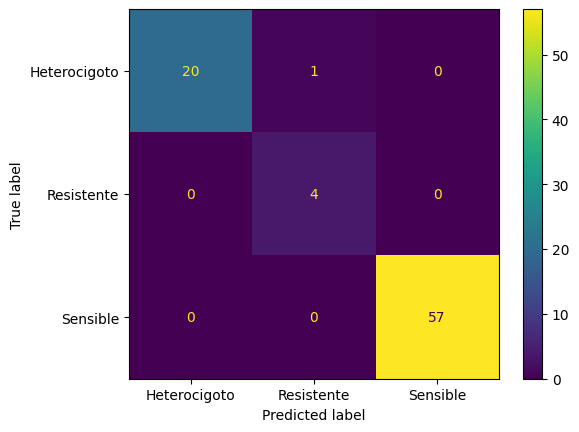

In [51]:
cm_random = confusion_matrix(y_test,y_pred,labels=['Heterocigoto', 'Resistente', 'Sensible'])
ConfusionMatrixDisplay(cm_random, display_labels=['Heterocigoto', 'Resistente', 'Sensible']).plot()

In [52]:
print(confusion_matrix(y_test, y_pred))

# True Positives  ---  False Negatives

# False Positives ---  True Negatives

[[20  1  0]
 [ 0  4  0]
 [ 0  0 57]]


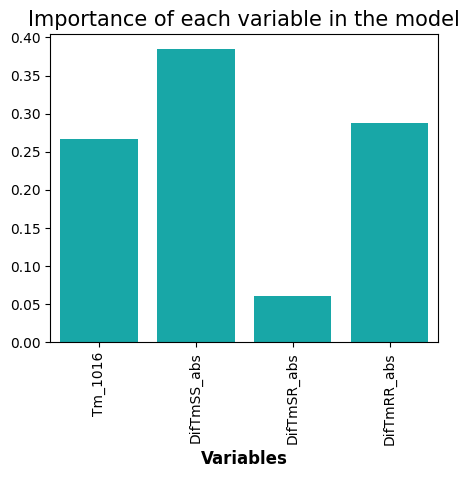

In [53]:
imp_variables = clf.feature_importances_

plt.figure(figsize=(5, 4))
sns.barplot(x=X_test.drop(columns=['id_muestra']).columns, y=imp_variables, color="c")
plt.xlabel("Variables", fontweight="black", fontsize=12)
plt.title("Importance of each variable in the model", fontsize=15, color="black")
plt.xticks(rotation=90, size=10)
plt.show()

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

Heterocigoto       1.00      0.95      0.98        21
  Resistente       0.80      1.00      0.89         4
    Sensible       1.00      1.00      1.00        57

    accuracy                           0.99        82
   macro avg       0.93      0.98      0.95        82
weighted avg       0.99      0.99      0.99        82



---